In [1]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
adv = pd.read_csv("advertising.csv")

In [6]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
adv.shape

(200, 4)

In [8]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


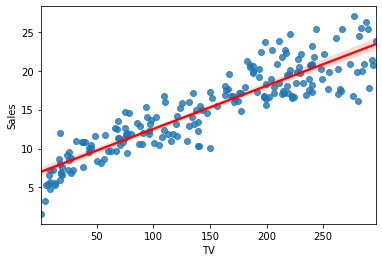

In [36]:
sns.regplot(data = adv , x = "TV" , y = "Sales" , line_kws = {"color" : "red"})
plt.show()

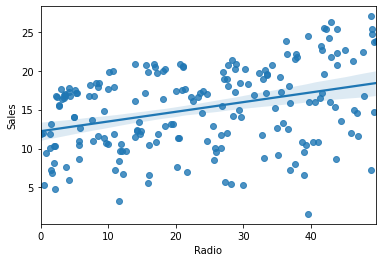

In [13]:
sns.regplot(data = adv , x = "Radio" , y = "Sales")
plt.show()

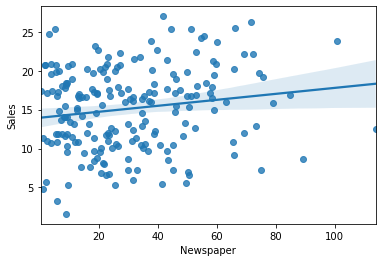

In [14]:
sns.regplot(data = adv , x = "Newspaper" , y = "Sales" )
plt.show()

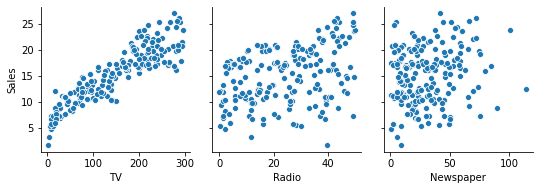

In [18]:
sns.pairplot(data = adv, x_vars = ["TV", "Radio", "Newspaper"], y_vars = ["Sales"])
plt.show()

In [21]:
res = adv.corr()
res

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


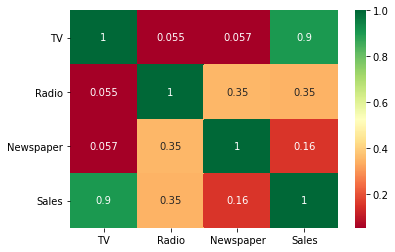

In [22]:
sns.heatmap(res, annot = True, cmap = 'RdYlGn')

In [24]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [25]:
X = adv["TV"]
y = adv["Sales"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [27]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [29]:
X_train.shape

(140,)

In [30]:
X_test.shape

(60,)

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [40]:
import statsmodels.api as sm

In [41]:
X_train_sm = sm.add_constant(X_train)

In [42]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [67]:
lr = sm.OLS(y_train, X_train_sm).fit() # OLS : Ordinary Least Squares

In [44]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [46]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.52e-52
Time:                        22:20:42   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`Variance and covariance are mathematical terms frequently used in statistics and probability theory. Variance refers to the spread of a data set around its mean value, while a covariance refers to the measure of the directional relationship between two random variables.`**

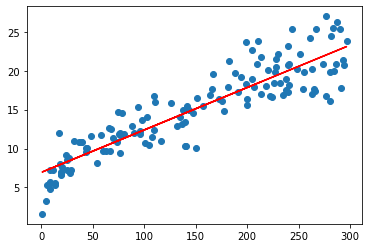

In [52]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.0545*X_train, 'r')
plt.show()

In [53]:
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

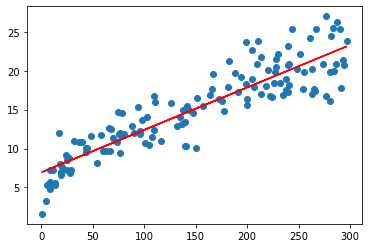

In [55]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

In [56]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

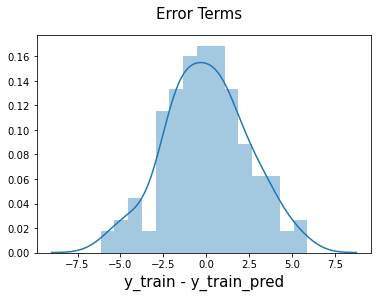

In [63]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

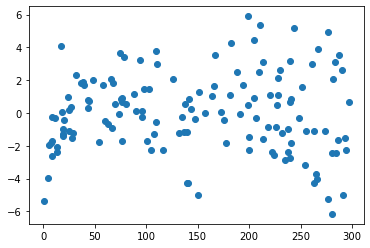

In [64]:
plt.scatter(X_train, res)
plt.show()

In [73]:
# do it for Test cases also


In [66]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [68]:
lr1 = sm.OLS(y_test, X_test_sm).fit()

In [70]:
lr1.params

const    6.726755
TV       0.059766
dtype: float64

In [72]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     252.2
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           8.76e-23
Time:                        11:32:31   Log-Likelihood:                -124.12
No. Observations:                  60   AIC:                             252.2
Df Residuals:                      58   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7268      0.602     11.166      0.000       5.521       7.933
TV             0.0598      0.004     15.882      0.000       0.052       0.067
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.693
Skew:                           0.264   Prob(JB):                        0.429
Kurtosis:                       2.369   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

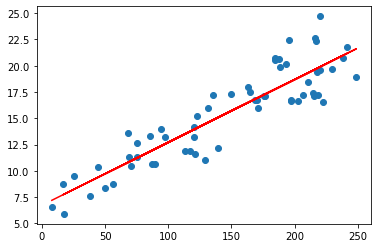

In [76]:
y_test_pred = lr1.predict(X_test_sm)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

In [82]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [94]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [96]:
X_test_lm.shape

(60, 1)

In [98]:
y_train_lm.shape

(140, 1)

In [84]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [100]:
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [103]:
print(lm.coef_)

[[0.05454575]]


In [105]:
print(lm.intercept_)

[6.9486832]


In [106]:
# make predictions


In [111]:
y_train_lm_pred = lm.predict(X_train_lm)
y_test_lm_pred = lm.predict(X_test_lm)

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [112]:
print(r2_score(y_true = y_test, y_pred = y_test_lm_pred))
print(r2_score(y_true = y_train, y_pred = y_train_lm_pred))

0.7921031601245662
0.8157933136480389
